# **APS1080: Introduction to Reinforcement Learning**
---

**Student Name**:
---



**Student ID:**

---
**Exercise III**: Cart-Pole with TD(0)


------



Solve the Cart-Pole control problem using TD(0) methods.

For control use

a. on-policy SARSA

b. off-policy Q learning

c. off-policy Expected SARSA with an epsilon-greedy policy



This is to prepare you for the next assignment which will be a slight extension of TD(0).

In [ ]:
!apt-get install -y xvfb python-opengl > /dev/null 2>&1
!pip install gym pyvirtualdisplay > /dev/null 2>&1
!sudo apt-get install xvfb


In [ ]:
import gym
import numpy as np
import matplotlib.pyplot as plt
from IPython import display as ipythondisplay
from collections import defaultdict
import random


In [ ]:
from pyvirtualdisplay import Display
display = Display(visible=0, size=(400, 300))
display.start()

--------

## Prelims


Iterations that were run: 12


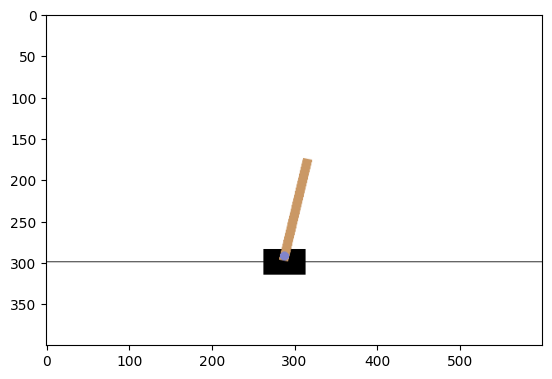

In [4]:
env = gym.make("CartPole-v0")
env.reset()
prev_screen = env.render(mode='rgb_array')
plt.imshow(prev_screen)

for i in range(50000):
  action = env.action_space.sample()
  print("step i",i,"action=",action)
  obs, reward, done, info = env.step(action)
  print("obs=",obs,"reward=",reward,"done=",done,"info=",info)
  screen = env.render(mode='rgb_array')

  plt.imshow(screen)
  ipythondisplay.clear_output(wait=True)
  ipythondisplay.display(plt.gcf())

  if done:
    break

ipythondisplay.clear_output(wait=True)
env.close()
print("Iterations that were run:",i)


In [6]:
# Initialize the environment
env = gym.make("CartPole-v0")
env.reset()

# Print the action space and number of actions
print("Action space:", env.action_space)
print("Number of actions:", env.action_space.n)
print("Actions are: 0 = push left, 1 = push right")

# Print the observation space and its range
print("Observation space:", env.observation_space)
print("Observation space low:", env.observation_space.low)
print("Observation space high:", env.observation_space.high)
print("States are: [cart position, cart velocity, pole angle, pole velocity at tip]")

# Run a few steps to see the reward and other information
rewards_sum = 0
for i in range(5):
    action = env.action_space.sample()  # Sample a random action
    obs, reward, done, info = env.step(action)  # Apply the action to the environment
    rewards_sum += reward
    print(f"Step {i}:")
    print("  Action:", action)
    print("  Observation:", obs)
    print("  Reward:", reward)
    print("  Cumulative Reward:", rewards_sum)
    print("  Done:", done)
    print("  Info:", info)
    if done:
        env.reset()

Action space: Discrete(2)
Number of actions: 2
Actions are: 0 = push left, 1 = push right
Observation space: Box([-4.8000002e+00 -3.4028235e+38 -4.1887903e-01 -3.4028235e+38], [4.8000002e+00 3.4028235e+38 4.1887903e-01 3.4028235e+38], (4,), float32)
Observation space low: [-4.8000002e+00 -3.4028235e+38 -4.1887903e-01 -3.4028235e+38]
Observation space high: [4.8000002e+00 3.4028235e+38 4.1887903e-01 3.4028235e+38]
States are: [cart position, cart velocity, pole angle, pole velocity at tip]
Step 0:
  Action: 0
  Observation: [ 0.02889036 -0.1744376   0.01557765  0.28937152]
  Reward: 1.0
  Cumulative Reward: 1.0
  Done: False
  Info: {}
Step 1:
  Action: 1
  Observation: [0.02540161 0.0204588  0.02136508 0.00164205]
  Reward: 1.0
  Cumulative Reward: 2.0
  Done: False
  Info: {}
Step 2:
  Action: 0
  Observation: [ 0.02581079 -0.17496294  0.02139793  0.3009886 ]
  Reward: 1.0
  Cumulative Reward: 3.0
  Done: False
  Info: {}
Step 3:
  Action: 0
  Observation: [ 0.02231153 -0.37038323  0.

--------------

# **a. on-policy SARSA**

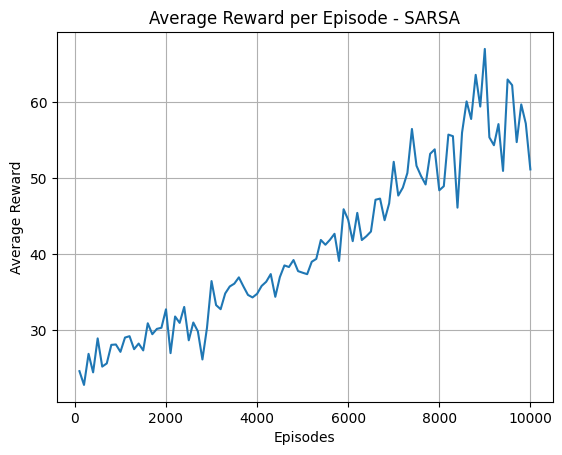

Max Average Reward is 67.01 Total Average Reward is 40.9566


In [12]:
# Create the MountainCar environment
env = gym.make("CartPole-v0")

# Parameters
alpha = 0.2  # Learning rate
gamma = 0.9  # Discount factor
epsilon = 0.8  # Initial epsilon for epsilon-greedy policy
max_episodes = 10000  # Maximum number of episodes

def round_state(state):
    """
    Discretize the continuous state space by rounding the state values.

    Args:
    - state: Current state of the environment

    Returns:
    - Tuple: Discretized state
    """
    state[0] = round(state[0], 1)
    state[1] = round(state[1], 1)
    state[2] = round(state[2], 1)
    state[3] = round(state[3], 1)
    return tuple(state)

def initial_Q():
    """
    Initialize the Q-values uniformly for all states.

    Returns:
    - Q: Dictionary with uniformly initialized Q-values for all states
    """
    Q = defaultdict(lambda: np.zeros(env.action_space.n))
    return Q

def epsilon_greedy_policy(state, Q, epsilon):
    """
    Epsilon-greedy policy for action selection.

    Args:
    - state: Current state of the environment
    - Q: Q-values
    - epsilon: Exploration-exploitation trade-off parameter

    Returns:
    - int: Selected action
    """
    if random.random() < epsilon:
        return np.random.randint(env.action_space.n)
    else:
        return np.argmax(Q[state])

def on_policy_sarsa(env, max_episodes, alpha, gamma, epsilon):
    """
    On-policy SARSA (State-Action-Reward-State-Action) algorithm.

    Args:
    - env: OpenAI Gym environment
    - max_episodes: Maximum number of episodes to run the algorithm
    - alpha: Learning rate
    - gamma: Discount factor
    - epsilon: Initial exploration-exploitation trade-off parameter

    Returns:
    - Q: Learned Q-values
    """
    Q = initial_Q()  # Initialize Q-values
    sum_reward = 0
    total_sum_reward = 0
    avg_reward = []

    for e in range(max_episodes):  # Loop for each episode
        state = env.reset()
        state = round_state(state)

        current_epsilon = epsilon * (1 - e / max_episodes)  # Decrease epsilon over time

        action = epsilon_greedy_policy(state, Q, current_epsilon)  # Select action using epsilon-greedy policy

        for i in range(200):
            next_state, reward, done, _ = env.step(action)
            next_state = round_state(next_state)

            next_action = epsilon_greedy_policy(next_state, Q, current_epsilon)  # Select next action

            # SARSA update
            Q[state][action] += alpha * (reward + gamma * Q[next_state][next_action] - Q[state][action])

            state = next_state
            action = next_action
            sum_reward += reward
            total_sum_reward += reward

            if done:
                break

        if (e + 1) % 100 == 0:  # Calculate average reward every 100 episodes
            avg = sum_reward / 100
            avg_reward.append(avg)
            sum_reward = 0

    # Plot average reward per episode
    l = np.arange(100, max_episodes + 1, 100).tolist()
    plt.plot(l, avg_reward)
    plt.xlabel("Episodes")
    plt.ylabel("Average Reward")
    plt.title("Average Reward per Episode - SARSA")
    plt.grid(True)
    plt.show()

    print("Max Average Reward is", np.max(avg_reward), "Total Average Reward is", total_sum_reward / max_episodes)

    return Q

# Run SARSA
Q_sarsa = on_policy_sarsa(env, max_episodes, alpha, gamma, epsilon)

------------

# **b. off-policy Q learning**


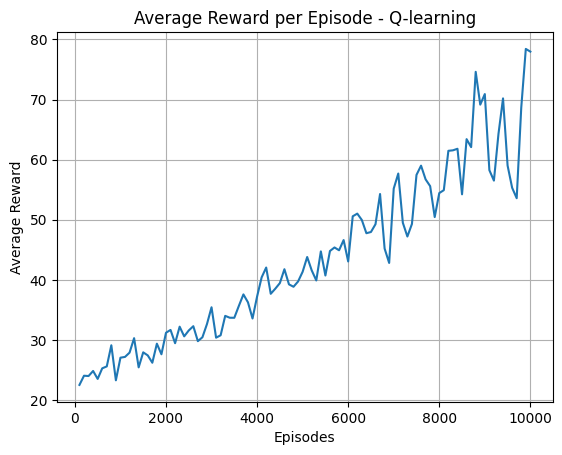

Max Average Reward is 78.42 Total Average Reward is 43.3116


In [13]:
# Initialize the environment
env = gym.make("CartPole-v0")

def off_policy_q_learning(env, max_episodes, alpha, gamma, epsilon):
    """
    Off-policy Q-learning algorithm.

    Args:
    - env: OpenAI Gym environment
    - max_episodes: Maximum number of episodes to run the algorithm
    - alpha: Learning rate
    - gamma: Discount factor
    - epsilon: Initial exploration-exploitation trade-off parameter

    Returns:
    - Q: Learned Q-values
    """
    Q = initial_Q()  # Initialize Q-values
    sum_reward = 0
    total_sum_reward = 0
    avg_reward = []

    for e in range(max_episodes):  # Loop for each episode
        state = env.reset()
        state = round_state(state)

        current_epsilon = epsilon * (1 - e / max_episodes)  # Decrease epsilon over time

        for i in range(200):
            action = epsilon_greedy_policy(state, Q, current_epsilon)  # Select action using epsilon-greedy policy
            next_state, reward, done, _ = env.step(action)
            next_state = round_state(next_state)

            # Q-learning update
            best_next_action = np.argmax(Q[next_state])
            Q[state][action] += alpha * (reward + gamma * Q[next_state][best_next_action] - Q[state][action])

            state = next_state
            sum_reward += reward
            total_sum_reward += reward

            if done:
                break

        if (e + 1) % 100 == 0:  # Calculate average reward every 100 episodes
            avg = sum_reward / 100
            avg_reward.append(avg)
            sum_reward = 0

    # Plot average reward per episode
    l = np.arange(100, max_episodes + 1, 100).tolist()
    plt.plot(l, avg_reward)
    plt.xlabel("Episodes")
    plt.ylabel("Average Reward")
    plt.title("Average Reward per Episode - Q-learning")
    plt.grid(True)
    plt.show()

    print("Max Average Reward is", np.max(avg_reward), "Total Average Reward is", total_sum_reward / max_episodes)

    return Q

# Run Q-learning
Q_q_learning = off_policy_q_learning(env, max_episodes, alpha, gamma, epsilon)


------

# **c. off-policy Expected SARSA with an epsilon-greedy policy**


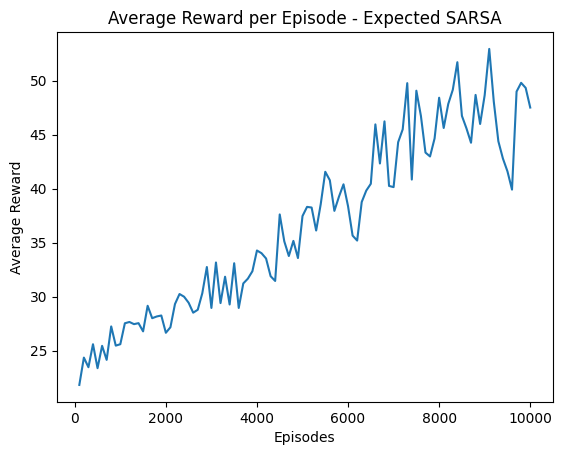

Max Average Reward is 52.95


In [14]:
# Off-Policy Expected SARSA algorithm

env = gym.make("CartPole-v0")

def off_policy_expected_sarsa(env, max_episodes, alpha, gamma, epsilon):
    Q = initial_Q()  # Initialize Q-values
    sum_reward = 0  # Store sum of rewards per episode
    avg_reward = []  # Store average rewards per 100 episodes

    # Loop for each episode
    for episode in range(max_episodes):
        state = round_state(env.reset())  # Reset and discretize initial state

        # Update epsilon for exploration-exploitation trade-off
        current_epsilon = epsilon * (1 - episode / max_episodes)

        for t in range(200):
            # Choose action from state using epsilon-greedy policy
            if random.random() < 1 - current_epsilon:
                action = np.argmax(Q[state])
            else:
                action = np.random.choice(env.action_space.n)

            next_state, reward, done, _ = env.step(action)  # Take action and observe next state and reward
            next_state = round_state(next_state)  # Discretize next state

            next_action = np.argmax(Q[next_state])  # Greedy action for the next state

            # Calculate expected value for the next state
            expected_value = sum(
                (1 - current_epsilon if k == next_action else current_epsilon / (env.action_space.n - 1))
                * Q[next_state][k]
                for k in range(env.action_space.n)
            )

            # Expected SARSA update
            Q[state][action] += alpha * (reward + gamma * expected_value - Q[state][action])

            state = next_state  # Update state
            sum_reward += reward  # Accumulate reward

            if done:
                break

        # Track average reward every 100 episodes
        if (episode + 1) % 100 == 0:
            avg = sum_reward / 100
            avg_reward.append(avg)
            sum_reward = 0  # Reset sum reward

    # Plot the average rewards
    plt.plot(np.arange(100, max_episodes + 1, 100), avg_reward)
    plt.xlabel("Episodes")
    plt.ylabel("Average Reward")
    plt.title("Average Reward per Episode - Expected SARSA")
    plt.show()

    print("Max Average Reward is", np.max(avg_reward))
    return Q


Q_expected_sarsa = off_policy_expected_sarsa(env, max_episodes, alpha, gamma, epsilon)

In [17]:
!jupyter nbconvert --to html "/content/Exercise_III_Cart_Pole_with_TD(0).ipynb"


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[NbConvertApp] Converting notebook /content/Exercise_III_Cart_Pole_with_TD(0).ipynb to html
[NbConvertApp] Writing 800197 bytes to /content/Exercise_III_Cart_Pole_with_TD(0).html
